In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("AnyConv.com__HARGA RUMAH JAKSEL.csv")
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [4]:
df.describe()

,HARGA,LT,LB,JKT,JKM
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


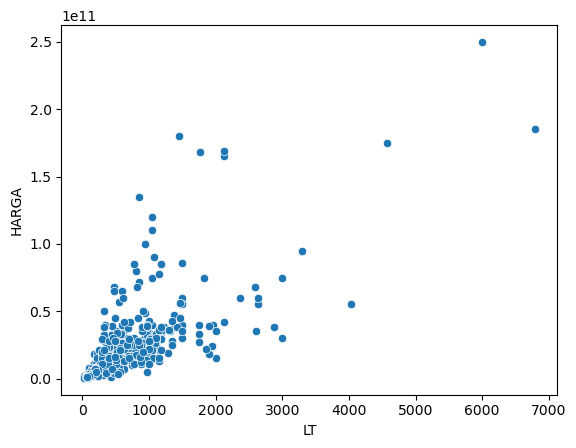

In [5]:
sns.scatterplot(data=df, x='LT',y='HARGA');

<Figure size 1500x500 with 0 Axes>

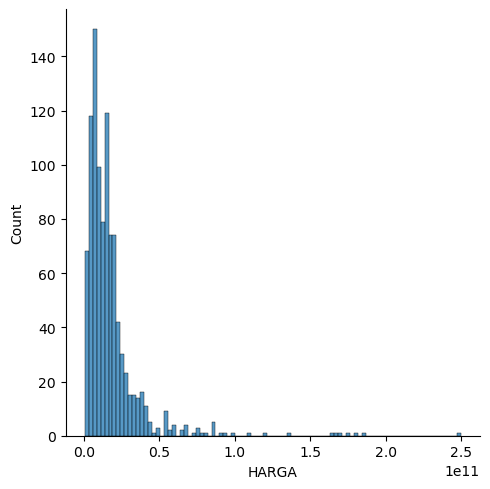

In [6]:
plt.figure(figsize=(15,5))
sns.displot(df['HARGA'])

In [7]:
garasi_nilai = df['GRS'].unique()
print("Nilai dalam kolom 'GRS':", garasi_nilai)

Nilai dalam kolom 'GRS': ['ADA' 'TIDAK ADA']


In [8]:
encoder = LabelEncoder()
df["GRS"] = encoder.fit_transform(df["GRS"])
df.head()
# 0 = Ada # 1 = Tidak Ada

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,0,JAKSEL
1,19000000000,824,800,4,4,0,JAKSEL
2,4700000000,500,400,4,3,0,JAKSEL
3,4900000000,251,300,5,4,0,JAKSEL
4,28000000000,1340,575,4,5,0,JAKSEL


In [9]:
X=df[['LT','LB','JKT','JKM','GRS']]
y=df['HARGA']
X.shape, y.shape

((1001, 5), (1001,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print(lr.intercept_)

-1773088423.626999


In [13]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LT,1.998820e+07
LB,1.252421e+07
JKT,2.713556e+08
JKM,4.452904e+08
GRS,-1.474225e+09


In [14]:
predictions = lr.predict(X_test)

In [15]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5697716642.685713
MSE: 1.4312124410804386e+20
RMSE: 11963329139.83578


In [16]:
score = lr.score(X_test, y_test)
print("Akurasi Model = ", score)
y_pred = lr.predict(X_test)
print("Akurasi %.2f%%" % (lr.score(X_test, y_test)*100))

Akurasi Model =  0.6794411129330178
Akurasi 67.94%


In [17]:
y_pred=lr.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
204,8000000000,9.120032e+09
71,55000000000,4.638771e+10
594,9000000000,1.738091e+10
673,35500000000,1.766281e+10
14,20000000000,1.956809e+10
...,...,...
798,1300000000,1.867088e+09
788,4970000000,8.471652e+09
663,2500000000,3.752519e+09
672,36000000000,3.645369e+10


In [18]:
input_data = np.array([[1100,700,5,6,0]])
prediction = lr.predict(input_data)

# Mengatur opsi cetak NumPy agar menampilkan angka tanpa notasi ilmiah dan dengan format mata uang
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})

# Mencetak hasil prediksi dengan simbol mata uang
print("Estimasi Harga Rumah Rp.", prediction[0])

Estimasi Harga Rumah Rp. 33009398772.823692


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
import pickle

filename = "lr-estimasi_harga_rumah_jaksel.sav"
pickle.dump(lr,open(filename, 'wb'))